# **Unveiling the Golden Age of Video Games**

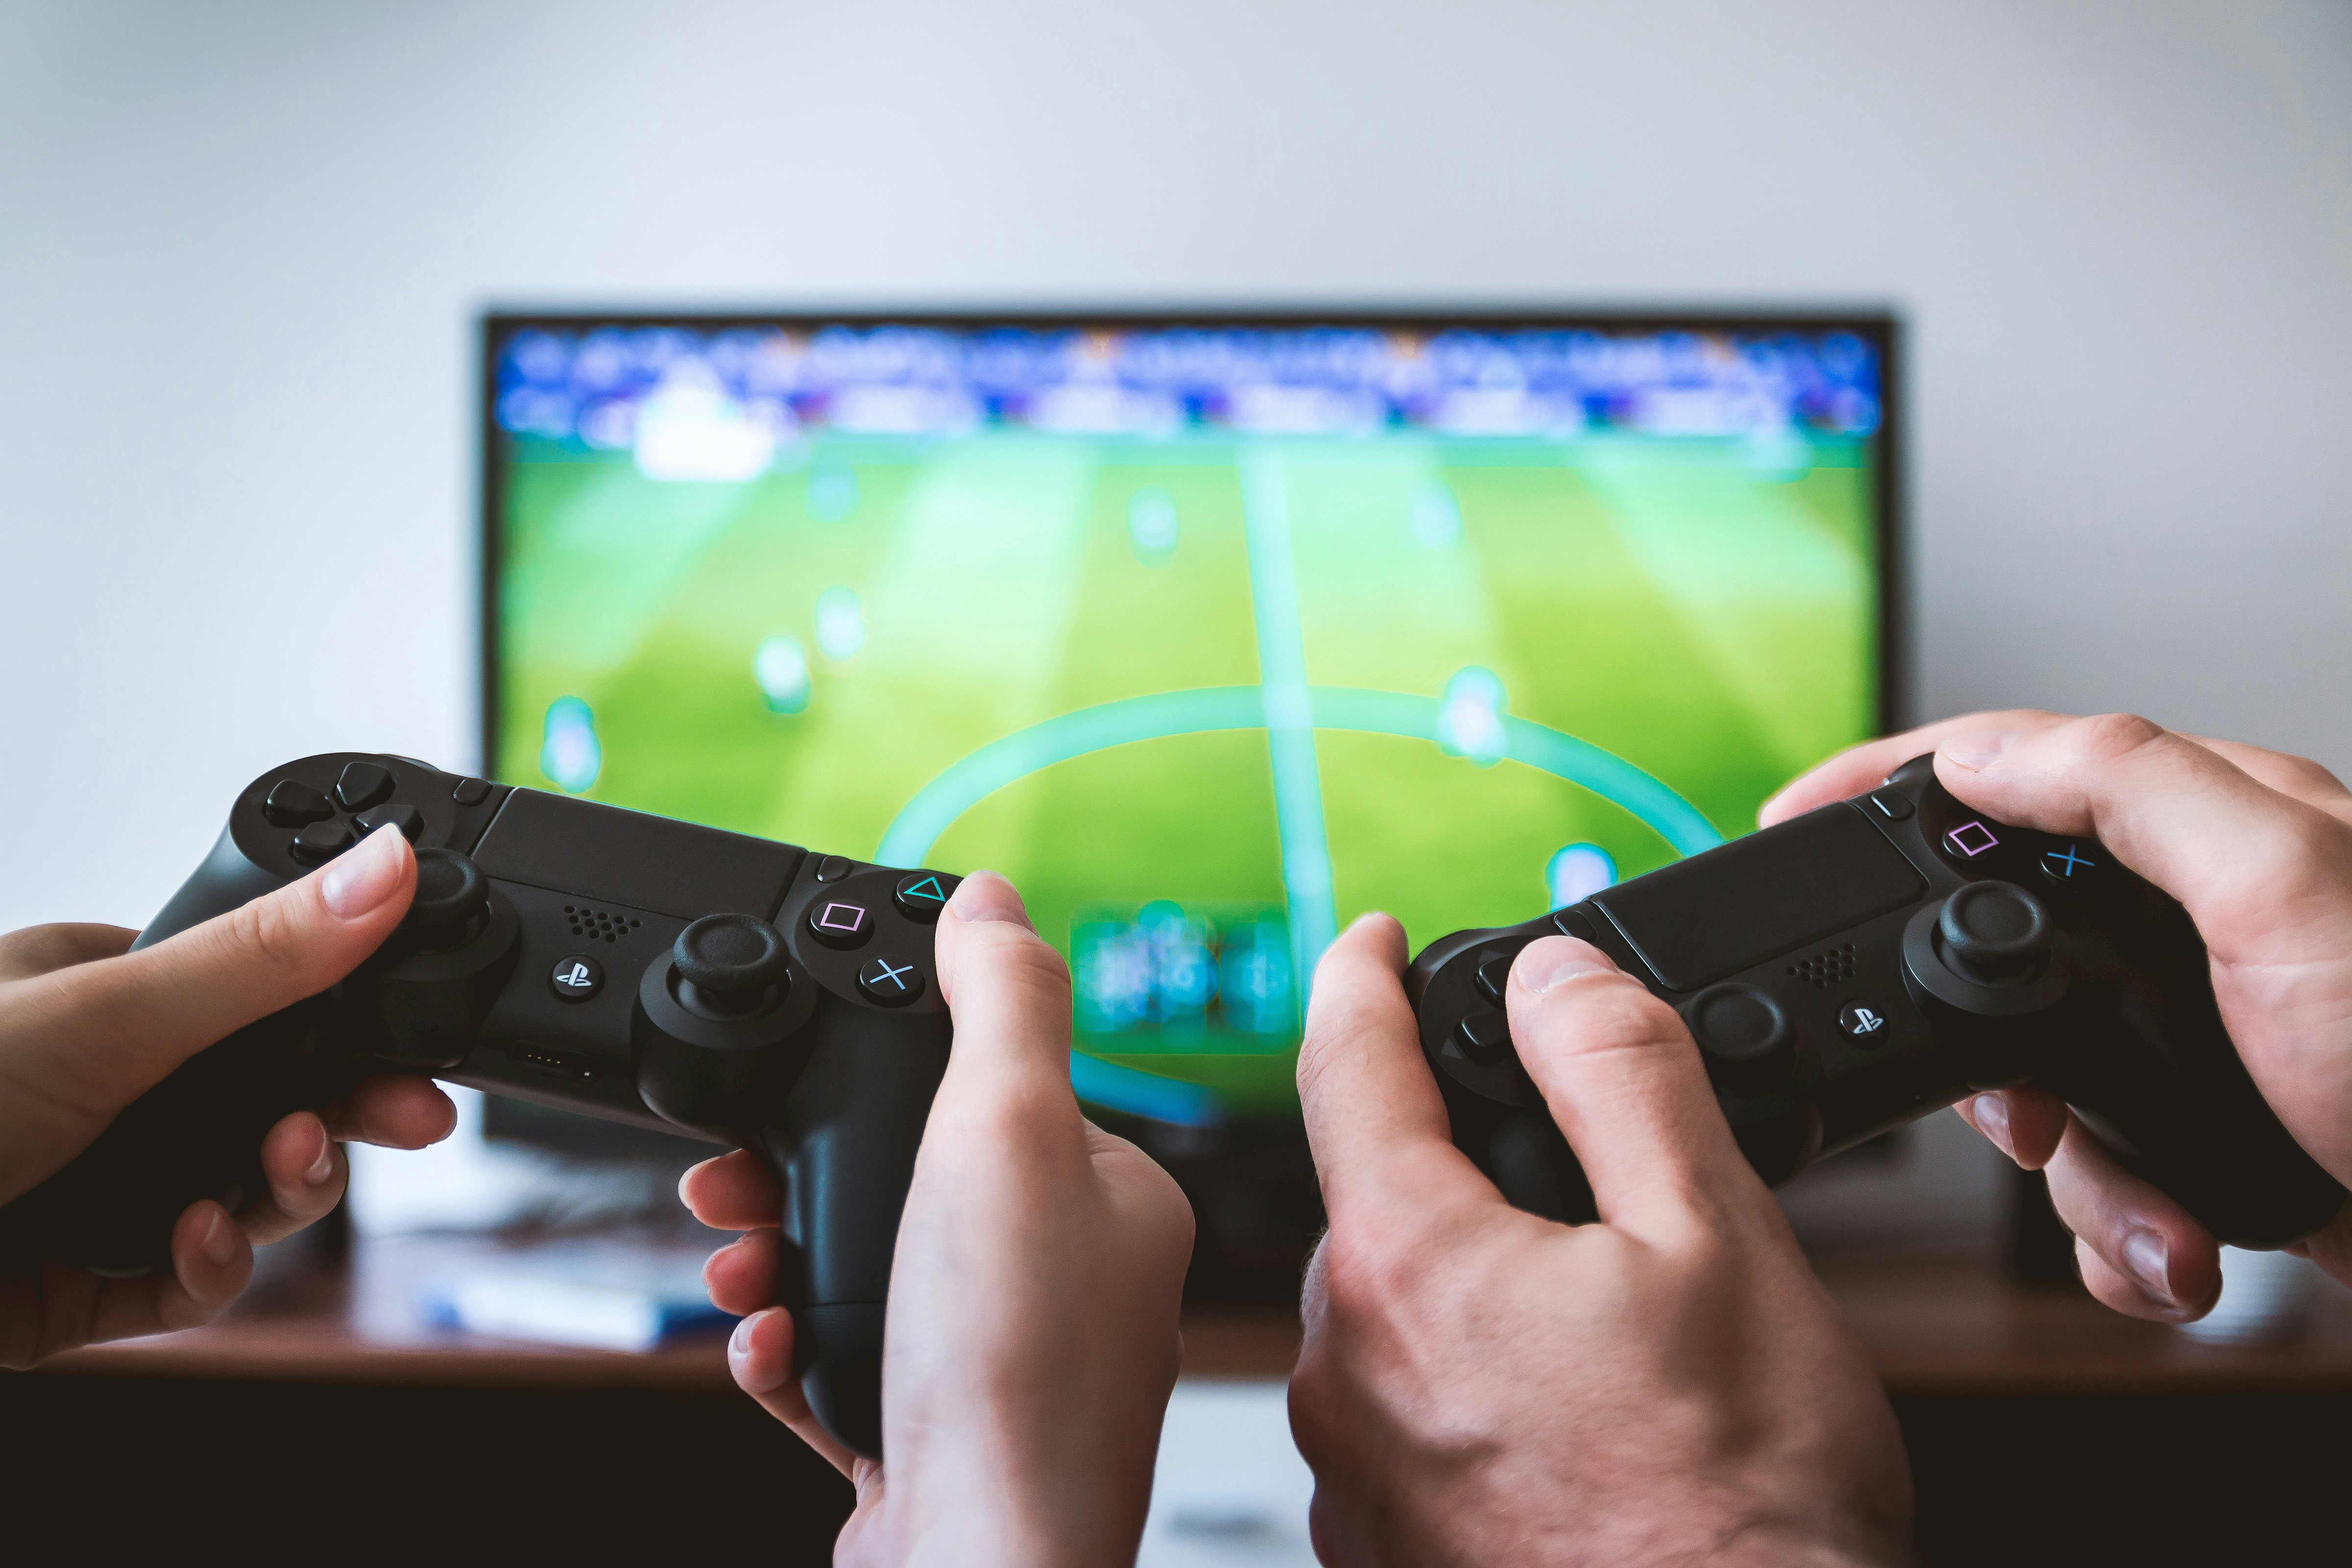

Photo by <a href="https://unsplash.com/@jeshoots?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">JESHOOTS.COM</a> on <a href="https://unsplash.com/photos/two-people-playing-sony-ps4-game-console-eCktzGjC-iU?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

<p>Video games are big business: the global gaming market is projected to be worth more than $300 billion by 2027 according to <a href="https://www.mordorintelligence.com/industry-reports/global-gaming-market">Mordor Intelligence</a>. With so much money at stake, the major game publishers are hugely incentivized to create the next big hit. But are games getting better, or has the golden age of video games already passed?</p>
<p>In this project, we'll explore the top 400 best-selling video games created between 1977 and 2020. We'll compare a dataset on game sales with critic and user reviews to determine whether or not video games have improved as the gaming market has grown.</p>
<p>Our database contains two tables. We've limited each table to 400 rows for this project, but you can find the complete dataset with over 13,000 games on <a href="https://www.kaggle.com/holmjason2/videogamedata">Kaggle</a>. </p>
<h3 id="game_sales"><code>game_sales</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>game</code></td>
<td>varchar</td>
<td>Name of the video game</td>
</tr>
<tr>
<td style="text-align:left;"><code>platform</code></td>
<td>varchar</td>
<td>Gaming platform</td>
</tr>
<tr>
<td style="text-align:left;"><code>publisher</code></td>
<td>varchar</td>
<td>Game publisher</td>
</tr>
<tr>
<td style="text-align:left;"><code>developer</code></td>
<td>varchar</td>
<td>Game developer</td>
</tr>
<tr>
<td style="text-align:left;"><code>games_sold</code></td>
<td>float</td>
<td>Number of copies sold (millions)</td>
</tr>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Release year</td>
</tr>
</tbody>
</table>
<h3 id="reviews"><code>reviews</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>game</code></td>
<td>varchar</td>
<td>Name of the video game</td>
</tr>
<tr>
<td style="text-align:left;"><code>critic_score</code></td>
<td>float</td>
<td>Critic score according to Metacritic</td>
</tr>
<tr>
<td style="text-align:left;"><code>user_score</code></td>
<td>float</td>
<td>User score according to Metacritic</td>
</tr>
</tbody>
</table>

## 1. The ten best-selling video games

Let's begin by looking at some of the top selling video games of all time!

In [ ]:
%%sql
postgresql:///games

-- Select all information for the top ten best-selling games
-- Order the results from best-selling game down to tenth best-selling

SELECT *
FROM game_sales
ORDER BY games_sold DESC
LIMIT 10;

10 rows affected.


game,platform,publisher,developer,games_sold,year
Wii Sports for Wii,Wii,Nintendo,Nintendo EAD,82.90,2006
Super Mario Bros. for NES,NES,Nintendo,Nintendo EAD,40.24,1985
Counter-Strike: Global Offensive for PC,PC,Valve,Valve Corporation,40.00,2012
Mario Kart Wii for Wii,Wii,Nintendo,Nintendo EAD,37.32,2008
PLAYERUNKNOWN'S BATTLEGROUNDS for PC,PC,PUBG Corporation,PUBG Corporation,36.60,2017
Minecraft for PC,PC,Mojang,Mojang AB,33.15,2010
Wii Sports Resort for Wii,Wii,Nintendo,Nintendo EAD,33.13,2009
Pokemon Red / Green / Blue Version for GB,GB,Nintendo,Game Freak,31.38,1998
New Super Mario Bros. for DS,DS,Nintendo,Nintendo EAD,30.80,2006
New Super Mario Bros. Wii for Wii,Wii,Nintendo,Nintendo EAD,30.30,2009


## 2. Missing review scores
<p>Wow, the best-selling video games were released between 1985 to 2017! That's quite a range; we'll have to use data from the <code>reviews</code> table to gain more insight on the best years for video games. </p>
<p>First, it's important to explore the limitations of our database. One big shortcoming is that there is not any <code>reviews</code> data for some of the games on the <code>game_sales</code> table. </p>

In [ ]:
%%sql

-- Join games_sales and reviews
-- Select a count of the number of games where both critic_score and user_score are null

SELECT COUNT(*)
FROM game_sales AS g
LEFT JOIN reviews AS r
USING (game)
WHERE r.critic_score IS NULL
    AND r.user_score IS NULL;

 * postgresql:///games
1 rows affected.


count
31


## 3. Years that video game critics loved
<p>It looks like a little less than ten percent of the games on the <code>game_sales</code> table don't have any reviews data. That's a small enough percentage that we can continue our exploration, but the missing reviews data is a good thing to keep in mind as we move on to evaluating results from more sophisticated queries. </p>
<p>There are lots of ways to measure the best years for video games! Let's start with what the critics think. </p>

In [ ]:
%%sql

-- Select release year and average critic score for each year, rounded and aliased
-- Join the game_sales and reviews tables
-- Group by release year
-- Order the data from highest to lowest avg_critic_score and limit to 10 results

SELECT g.year,
       ROUND(AVG(r.critic_score), 2) AS avg_critic_score
FROM game_sales AS g
INNER JOIN reviews AS r
USING (game)
GROUP BY g.year
ORDER BY avg_critic_score DESC
LIMIT 10;

 * postgresql:///games
10 rows affected.


year,avg_critic_score
1990,9.80
1992,9.67
1998,9.32
2020,9.20
1993,9.10
1995,9.07
2004,9.03
1982,9.00
2002,8.99
1999,8.93


## 4. Was 1982 really that great?
<p>The range of great years according to critic reviews goes from 1982 until 2020: we are no closer to finding the golden age of video games! </p>
<p>Hang on, though. Some of those <code>avg_critic_score</code> values look like suspiciously round numbers for averages. The value for 1982 looks especially fishy. Maybe there weren't a lot of video games in our dataset that were released in certain years. </p>
<p>Let's update our query and find out whether 1982 really was such a great year for video games.</p>

In [ ]:
%%sql

-- Paste your query from the previous task; update it to add a count of games released in each year called num_games
-- Update the query so that it only returns years that have more than four reviewed games

SELECT g.year,
       COUNT(*) AS num_games,
       ROUND(AVG(r.critic_score), 2) AS avg_critic_score
FROM game_sales AS g
INNER JOIN reviews AS r
USING (game)
GROUP BY g.year
HAVING COUNT(*) > 4
ORDER BY avg_critic_score DESC
LIMIT 10;

 * postgresql:///games
10 rows affected.


year,num_games,avg_critic_score
1998,10,9.32
2004,11,9.03
2002,9,8.99
1999,11,8.93
2001,13,8.82
2011,26,8.76
2016,13,8.67
2013,18,8.66
2008,20,8.63
2017,13,8.62


## 5. Years that dropped off the critics' favorites list
<p>That looks better! The <code>num_games</code> column convinces us that our new list of the critics' top games reflects years that had quite a few well-reviewed games rather than just one or two hits. But which years dropped off the list due to having four or fewer reviewed games? Let's identify them so that someday we can track down more game reviews for those years and determine whether they might rightfully be considered as excellent years for video game releases!</p>
<p>It's time to brush off your set theory skills. To get started, we've created tables with the results of our previous two queries:</p>
<h3 id="top_critic_years"><code>top_critic_years</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_critic_score</code></td>
<td>float</td>
<td>Average of all critic scores for games released in that year</td>
</tr>
</tbody>
</table>
<h3 id="top_critic_years_more_than_four_games"><code>top_critic_years_more_than_four_games</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>num_games</code></td>
<td>int</td>
<td>Count of the number of video games released in that year</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_critic_score</code></td>
<td>float</td>
<td>Average of all critic scores for games released in that year</td>
</tr>
</tbody>
</table>

In [ ]:
%%sql

-- Select the year and avg_critic_score for those years that dropped off the list of critic favorites
-- Order the results from highest to lowest avg_critic_score

SELECT year, avg_critic_score
FROM top_critic_years
EXCEPT
SELECT year, avg_critic_score
FROM top_critic_years_more_than_four_games
ORDER BY avg_critic_score DESC;

 * postgresql:///games
6 rows affected.


year,avg_critic_score
1990,9.80
1992,9.67
2020,9.20
1993,9.10
1995,9.07
1982,9.00


## 6. Years video game players loved
<p>Based on our work in the task above, it looks like the early 1990s might merit consideration as the golden age of video games based on <code>critic_score</code> alone, but we'd need to gather more games and reviews data to do further analysis. </p>
<p>Let's move on to looking at the opinions of another important group of people: players! To begin, let's create a query very similar to the one we used in Task Four, except this one will look at <code>user_score</code> averages by year rather than <code>critic_score</code> averages.</p>

In [ ]:
%%sql

-- Select year, an average of user_score, and a count of games released in a given year, aliased and rounded
-- Include only years with more than four reviewed games; group data by year
-- Order data by avg_user_score, and limit to ten results

SELECT g.year,
       COUNT(*) AS num_games,
       ROUND(AVG(r.user_score), 2) AS avg_user_score
FROM game_sales AS g
INNER JOIN reviews AS r
USING (game)
GROUP BY g.year
HAVING COUNT(*) > 4            -- more than 4 games released for the year
ORDER BY avg_user_score DESC
LIMIT 10;

 * postgresql:///games
10 rows affected.


year,num_games,avg_user_score
1997,8,9.50
1998,10,9.40
2010,23,9.24
2009,20,9.18
2008,20,9.03
1996,5,9.00
2005,13,8.95
2006,16,8.95
2000,8,8.80
2002,9,8.80


## 7. Years that both players and critics loved
<p>Alright, we've got a list of the top ten years according to both critic reviews and user reviews. Are there any years that showed up on both tables? If so, those years would certainly be excellent ones!</p>
<p>Recall that we have access to the <code>top_critic_years_more_than_four_games</code> table, which stores the results of our top critic years query from Task 4:</p>
<h3 id="top_critic_years_more_than_four_games"><code>top_critic_years_more_than_four_games</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>num_games</code></td>
<td>int</td>
<td>Count of the number of video games released in that year</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_critic_score</code></td>
<td>float</td>
<td>Average of all critic scores for games released in that year</td>
</tr>
</tbody>
</table>
<p>We've also saved the results of our top user years query from the previous task into a table:</p>
<h3 id="top_user_years_more_than_four_games"><code>top_user_years_more_than_four_games</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>num_games</code></td>
<td>int</td>
<td>Count of the number of video games released in that year</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_user_score</code></td>
<td>float</td>
<td>Average of all user scores for games released in that year</td>
</tr>
</tbody>
</table>

In [ ]:
%%sql

-- Select the year results that appear on both tables

SELECT year
FROM top_critic_years_more_than_four_games
INTERSECT
SELECT year
FROM top_user_years_more_than_four_games

 * postgresql:///games
3 rows affected.


year
1998
2008
2002


## 8. Sales in the best video game years
<p>Looks like we've got three years that both users and critics agreed were in the top ten! There are many other ways of measuring what the best years for video games are, but let's stick with these years for now. We know that critics and players liked these years, but what about video game makers? Were sales good? Let's find out.</p>
<p>This time, we haven't saved the results from the previous task in a table for you. Instead, we'll use the query from the previous task as a subquery in this one! This is a great skill to have, as we don't always have write permissions on the database we are querying.</p>

In [ ]:
%%sql

-- Select year and sum of games_sold, aliased as total_games_sold; order results by total_games_sold descending
-- Filter game_sales based on whether each year is in the list returned in the previous task

SELECT year,
       SUM(games_sold) AS total_games_sold
FROM game_sales
WHERE year IN (SELECT year
               FROM top_critic_years_more_than_four_games
               INTERSECT
               SELECT year
               FROM top_user_years_more_than_four_games)
GROUP BY year
ORDER BY total_games_sold DESC;

 * postgresql:///games
3 rows affected.


year,total_games_sold
2008,175.07
1998,101.52
2002,58.67
